# Chapter 10: Python Linear Algebra (线性代数)
___

## Concept: Linear vector space (线性向量空间)

A linear vector space $\mathcal{X}$ is a collection of elements satisfying the following properties:

### addition (加法律): $\forall x, y, z \in \mathcal{X}$
1. $x + y \in \mathcal{X}$
2. $x + y = y + x$
3. $(x + y) + z = x + (y + z)$
4. $\exists 0 \in \mathcal{X}$, such that $x + 0 = x$
5. $\forall x \in \mathcal{X}, \exists −x \in \mathcal{X}$ such that $x + (−x) = 0$

### multiplication (乘法律): $\forall x, y \in \mathcal{X}$ and $a, b \in R$
1. $ax \in \mathcal{X}$
2. $a(bx) = (ab) x$
3. $1x = x, 0x = 0$
4. $a(x + y) = ax + ay$

### Example: $\mathbb{R}^n$

The $n$-dimensional Euclidean $\mathbb{R}^n$, is a linear vector space.

## Concept: Inner product (向量内积)

An __inner product__ is a mapping: $\mathcal{X} \times \mathcal{X} \mapsto \mathbb{R}$.

The inner product between any $x, y \in \mathcal{X}$ is denoted by $\langle x, y \rangle$ and it satisfies
the following properties for all $x, y, z \in \mathcal{X}$:

1. $\langle x, y \rangle = \langle y, x \rangle$
2. $\langle ax, y \rangle = a \langle x, y \rangle$ for all scalars $a$
3. $\langle x + y, z \rangle = \langle x, z \rangle + \langle y, z \rangle$
4. $\langle x, x \rangle \ge 0$ and $\langle x, x \rangle = 0 \Rightarrow x = 0$

A space $\mathcal{X}$ equipped with an inner product is called an __inner product space__.

### Definition: Orthongonal Vectors (正交向量)

$x$ and $y$ are __orthogonal vectors__ if:
$$
\langle x, y \rangle = 0
$$

Let $\mathcal{X} = \mathbb{R}^n$, then
$$
\langle x, y \rangle := x^T y = \sum_{i=1}^n x_i y_i
$$

## Definition: Norms (向量范数)

The inner product induces the defintion of norms:
$$
\lVert x \rVert = \sqrt{\langle x, x \rangle}
$$
here the norm measure the size (length) of $x$.

The inner product can be written into the following form with norms:
$$
\langle x, y \rangle = \Vert x \Vert \Vert y \Vert \cos \theta
$$
where $\theta$ is the angle between vectors $x$ and $y$. 

注：这里的范数特指$L-2$ norm

### Cauchy-Schwartz inequality (柯西-施瓦茨不等式)
$$
\langle x, y \rangle \le \Vert x \Vert \Vert y \Vert
$$

注：当等式成立时，$\theta=0$，也就是说$x$与$y$线性相关，或者平行（几何上）。

### Triangle inequality (三角不等式)
$$
\Vert x - y \Vert \le \Vert x \Vert + \Vert y \Vert
$$

注：当等式成立时，$x$与$y$方向相反。

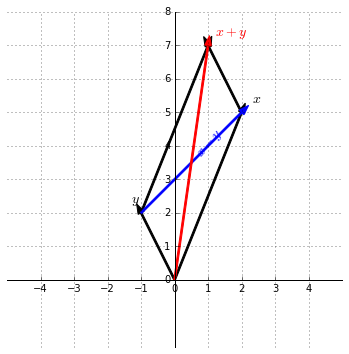

In [208]:
fig = plt.figure(figsize=(6,6))
x = np.array([2, 5])
y = np.array([-1, 2])
z = x - y
w = x + y
ax = fig.add_subplot(1,1,1)
ax.arrow(0, 0, x[0], x[1], width=0.05, fc='k', head_width=0.2, head_length=0.3)
ax.arrow(0, 0, y[0], y[1], width=0.05, fc='k', head_width=0.2, head_length=0.3)
ax.arrow(y[0], y[1], x[0], x[1], width=0.05, fc='k', head_width=0.2, head_length=0.3)
ax.arrow(x[0], x[1], y[0], y[1], width=0.05, fc='k', head_width=0.2, head_length=0.3)
ax.arrow(y[0], y[1], z[0], z[1], width=0.05, head_width=0.2, head_length=0.3, ec='b', fc='b')
ax.arrow(0, 0, w[0], w[1], width=0.05, head_width=0.2, head_length=0.3, ec='r', fc='r')
ax.text(x[0]+0.3, x[1]+0.3, '$x$', fontsize=14)
ax.text(y[0]-0.3, y[1]+0.3, '$y$', fontsize=14)
ax.text(w[0]+0.2, w[1]+0.3, '$x+y$', fontsize=14, color='r')
ax.text(0.6, 4.3, '$x-y$', fontsize=14, rotation=49, color='b')
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 8)
ax.set_xticks(range(-4,5))
ax.set_yticks(range(0,9))
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [195]:
ax.set_yticks?

In [182]:
cosine = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [188]:
print "The angle between {} and {} is {:.2f} degree.".format(x, y, np.arccos(cosine)*180/np.pi)

The angle between [2 5] and [-1  2] is 48.37 degree.


### Homogeneity (同质化)

For $x \in \mathcal{X}$ and a scalar $a$:
$$
\| ax \| = \left | a \right | \| x \|
$$

### Pythagorean theorem (毕达哥拉斯定理，勾股定理)

If $x, y \in \mathcal{X}$ and $\langle x, y \rangle = 0$, then
$$
\| x \|^2 + \| y \|^2 = \| x + y \|^2
$$

### Parallelogram law (平行四边形定律)

If $x, y \in \mathcal{X}$
$$
\| x + y \|^2 + \| x − y \|^2 = 2 \| x \|^2 + 2 \| y \|^2
$$
Since
$$
\begin{align}
\| x - y \|^2 = \|x\|^2 + \|y\|^2 - 2 \|x\|\|y\| \cos \theta \\
\| x + y \|^2 = \|x\|^2 + \|y\|^2 - 2 \|x\|\|y\| \cos(\pi - \theta)
\end{align}
$$

## Hilbert space (希尔伯特空间)

An inner product space that contains all its limits is called a __Hilbert Space__ and in this case we often denote the space by $\mathcal{H}$.

注：也就是说，如果$x_1, x_2, \ldots \in \mathcal{H}$ 且 $\lim_{x \to \infty} x_n$存在，则该极限也属于$\mathcal{H}$. 欧氏空间就是一种特殊的希尔伯特空间。

## Linearly independent (线性无关)

For a set of vectors
$$
x_1, x_2, \ldots, x_p \in \mathcal{X},
$$

if there exists a set of scalars $a_1, a_2, \ldots, a_p \in \mathbb{R}$ such that not all $a_i = 0$ and 
$$
\sum_{i=1}^p a_i x_i = 0
$$

we say that $x_1, x_2, \ldots, x_p$ are __linearly dependent（线性相关）__.

If equation only holds in the case $a_1=a_2=\ldots=a_p=0$, then we say that the vectors are __linearly independent (线性无关)__.

注：如果上式成立，且存在$a_k \neq 0$，则
$$
x_k = -\sum_{i \neq k} \frac{a_i}{a_k} x_i
$$
也就是说，$x_k$可以写成除了$x_k$之外其他向量的线性组合。

## Definition: Basis (基)

A set of vectors $\{\phi_i\}_{i=1}^n$ is a __basis (基)__ for $\mathcal{X}$ if an arbitrary vector $x \in \mathcal{X}$ can be expressed as the linear combination of $\{\phi_i\}_{i=1}^n$. That is, there exists a set of scalars $\{\theta_i\}_{i=1}^n$, such that
$$
x = \sum_{i=1}^n \theta_i \phi_i
$$

### Orthonormal basis (正交基)

The bases $\{\phi_i\}_{i=1}^n$ are orthonormal if 
$$
\phi_i^T \phi_j = \left\{
\begin{array}{ll}
0, & i \neq j\\
1, & i = j
\end{array}
\right.
$$

### Orhobasis of Hilbert space (希尔伯特空间的正交基)

Every $x \in \mathcal{H}$ can be represented in terms of an orthonormal basis $\{\phi_i\}_{i \ge 1}$ (or ‘orthobasis’ for short) according to:
$$
x = \sum_{i \ge 1} \langle x, \phi_i \rangle \phi_i
$$

This is easy to see as follows. Suppose x has a representation $\sum_i \theta_i \phi_i$. Then
$$
\theta_i = \langle x, \phi_i \rangle
$$

### Example: Orthonormal basis for $\mathbb{R^n}$
$$
\phi_k = \left[0, \cdots, 1, \cdots, 0 \right]^{-1}
$$
where
$$
\phi_{k, i} = \left\{
\begin{array}{ll}
0, & i \neq k\\
0, & i = k
\end{array}
\right.
$$

### Gram-Schmidt Orthogonalization (格兰-施密特正交变换)

Any basis can be converted into an orthonormal basis using __Gram-Schmidt Orthogonalization__.

Start with an arbitrary (non-orthogonal) basis $\{\phi_i\}$.
1. $\psi_1 := \phi_1 / \Vert \phi_1 \Vert$
2. for $k=2$
$$
\begin{array}{lcl}
\tilde{\psi}_2 &:=& \phi_2 − \langle \varphi_1, \phi_2 \rangle \varphi_1 \\
\psi_2 &:=& \tilde{\psi}_2 / \Vert \tilde{\psi}_2 \Vert
\end{array}
$$
3. for $k = 3, . . . , n$,
$$
\begin{array}{lcl}
\tilde{\psi}_k &:=& \phi_k − \sum_{i=1}^{k-1} \langle \psi_{i}, \phi_k \rangle \psi_i\\
\psi_k &:=& \tilde{\psi}_k/\Vert \tilde{\psi}_k \Vert
\end{array}
$$

注：该方法采取了一种去除其中前面正交基线性组合的部分的策略。

## Subspace (子空间)

Consider a set of vectors $\{x_i\}_{i=1}^p \in \mathcal{X}$. The __span__ of these vectors is the set of all vectors $x \in \mathcal{X}$ that can be generated from linear combinations of the set
$$
\operatorname{span}(\left\{xi\right\}_{i=1}^p) := \left\{ x : x = \sum_{i=1}^p a_i x_i, a_1, \ldots, a_p \in \mathbb{R} \right\}
$$
This set is also called a subspace of $\mathcal{X}$.

A subset $\mathcal{M} \subset \mathcal{X}$ is a subspace if $x, y \in \mathcal{M}$, we have
$$
ax + by \subset \mathcal{M}
$$

注：如果$\phi_1, \cdots, \phi_p$是子空间$\mathcal{M} \subset \mathbb{R}^n$的一组正交基，则该子空间中的任意向量$x \in \mathcal{M}$可以写成：
$$
x = \sum_{i=1}^p \theta_i \phi_i
$$

这样虽然$x \in \mathbb{R}^n$，但由于其是$\mathcal{M}$中的向量，所以可以写成$p$个自由参数的线性组合，也就是说其自由度为$p$。

因此我们说$\mathcal{M}$是$\mathbb{R}^n$的$p$-维子空间。

### $\S$ Example 1 of subspaces when $n=3$

We have an orthonormal basis $$
\phi_1 = \left[ \begin{array}{c}
1\\
0\\
0
\end{array}\right], \phi_2 = \left[ \begin{array}{c}
0\\
1\\
0
\end{array}\right]
$$
Therefore, $\operatorname{span}(\phi_1, \phi_2) = \left\{
\left[\begin{array}{c}
a\\
b\\
0
\end{array}\right]: a,b \in \mathbb{R}
\right\}$

### $\S$ Example 2 of subspaces when $n=3$

We have an orthonormal basis $$
\phi_1 = \left[ \begin{array}{c}
1/\sqrt{2}\\
1/\sqrt{2}\\
0
\end{array}\right], \phi_2 = \left[ \begin{array}{c}
0\\
0\\
1
\end{array}\right]
$$
Therefore, $\operatorname{span}(\phi_1, \phi_2) = \left\{
\left[\begin{array}{c}
a\\
a\\
b
\end{array}\right]: a,b \in \mathbb{R}
\right\}$

## Orthogonal projection (正交投影)

Let $\mathcal{H}$ be a __Hilbert space__ and let $\mathcal{M} \subset \mathcal{H}$ be a subspace. Every $x \in \mathcal{H}$ can be written as
$$
x = y + z
$$
where $y \in \mathcal{M}$ and $z \perp \mathcal{M}$, which is shorthand for $z$ orthogonal to $\mathcal{M}$; that is
$$
\forall v \in \mathcal{M}, \langle v, z \rangle = 0
$$

The vector $y$ is the optimal approximation to $x$ in terms of vectors in $M$ in the following sense:
$$
y = \operatorname{argmin}_{v \in \mathcal{M}} \| x − v \|
$$
The vector $y$ is called the __projection of $x$ onto $\mathcal{M}$__.

### Orthogonal subspace projection (正交子空间投影)

Let $\mathcal{M} \subset \mathcal{H}$ and let $\{\phi_i\}_{i=1}^r$ be an orthobasis for $\mathcal{M}$. For any
$x \in \mathcal{H}$, the projection of $x$ onto $\mathcal{M}$ is given by
$$
y = \sum_{i=1}^r \langle \phi_i, x \rangle \phi_i
$$
and this projection can be viewed as a sort of filter that __removes all components of the signal $x$ that are orthogonal to $\mathcal{M}$__.

### $\S$Example 1

Let $\mathcal{H} = \mathbb{R}^2$. Consider the canonical coordinate system $\phi_1 = \left[\begin{array}{c}
1\\
0
\end{array}\right]$ and $\phi_2 = \left[\begin{array}{c}
0\\
1
\end{array}\right]$. Let $\mathcal{M}$ be the subspace spanned by $\phi_1$. The projection of any $x = [x_1\; x_2]^T \in \mathbb{R}^2$ onto $\mathcal{M}$ is

$$
\begin{array}{lcl}
P_1x &=& \langle x, \phi_1 \rangle \phi_1\\
& = & \left[ \begin{array}{cc}
x_1 & x_2
\end{array}\right] \left[ \begin{array}{c}
1\\
0
\end{array}\right] \left[ \begin{array}{c}
1\\
0
\end{array}\right] \\
& = & \left[ \begin{array}{c}
x_1\\
0
\end{array}\right]
\end{array}
$$


The projection operator $P_1$ is just a matrix and it is given by
$$
\begin{array}{lcl}
P_1 &:=& \phi_1 \phi_1^T \\
& = & \left[ \begin{array}{c}
1\\
0
\end{array}\right] \left[ \begin{array}{cc}
1 & 0
\end{array}\right]\\
& = & \left[ \begin{array}{cc}
1 & 0\\
0 & 0
\end{array}\right]
\end{array}
$$

### $\S$Example 2

The set of vectors $\phi_1 = \left[\begin{array}{c}
1/\sqrt{2}\\
1/\sqrt{2}
\end{array}\right]$ and $\phi_2 = \left[\begin{array}{c}
1/\sqrt{2}\\
-1/\sqrt{2}
\end{array}\right]$ is another orthobasis on $\mathbb{R}^2$. What is the projection operator onto the span of $\phi_1$ in this case?

$$
P_1 = \phi_1 \phi_1^T = \left[\begin{array}{c}
1/\sqrt{2}\\
1/\sqrt{2}
\end{array}\right] \left[ 1/\sqrt{2}\;1/\sqrt{2} \right] = \left[\begin{array}{c}
1/2 & 1/2\\
1/2 & 1/2
\end{array}\right]
$$

## Orthogonal projections in Euclidean subspaces

More generally suppose we are considering  $\mathbb{R}^n$ and we have a orthonormal basis $\{\phi_i\}_{i=1}^r$ for some $r$-dimensional ($r < n$) subspace $\mathcal{M}$ of $\mathbb{R}^n$. Then the projection matrix is given by
$$
P_{\mathcal{M}} = \sum_{i=1}^r \phi_i \phi_i^T
$$

Moreover, if $\{\phi_i\}_{i=1}^r$ is a basis for $\mathcal{M}$, but not necessarily orthonormal, then
$$
P_{\mathcal{M}} = \Phi(\Phi^T \Phi)^{−1}\Phi^T
$$
where $\Phi = [\phi_1, \ldots, \phi_r]$, a matrix whose columns are the basis vectors.

注：这被用在线性回归模型$y=X\beta$的求解上，其最小二乘解析解就是$y$到$X$张成的$p$-维子空间的正交投影：
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

## Eigendecomposition of a symmetric matrix (对称阵的特征分解)

Let $C \in \mathbb{R}^{n \times n}$ is a real, symmetric matrix ($C^T = C$). $v \in \mathbb{R}^n$ is the __eigenvector (特征向量)__ of $C$ such that:
$$
C v = \lambda v
$$
where $\lambda$ is the eigenvalue (特征值) of $C$ corresponding to $v$.

There are $n$ orthonormal eigenvectors for $C$ such that
$$
\langle v_i, v_j \rangle = \delta_{ij}
$$

Let $V = [v_1, \ldots, v_n]$, then
$$
C = V \Lambda V^T
$$
where $\Lambda = \operatorname{diag}(\lambda_1, \ldots, \lambda_n)$.

## Singular value decomposition (SVD, 奇异值分解)

The SVD of an $n \times p$ matrix $H$ is written as
$$
H = \underbrace{U}_{n \times p}\quad \underbrace{\Sigma}_{p \times p}\quad \underbrace{V^T}_{p \times p}
$$

* $U=[u_1, \cdots, u_p]$ where $\{u_i\}_{i=1}^p$ are real $n$-dimensional vectors, and called the __left singular vectors__ of $H$. $U^TU = I_p$.
* $\Sigma = \operatorname{diag}(\sigma_1, \cdots, \sigma_p), \sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_p \ge 0$. And $\{\sigma_i\}_{i=1}^p$ are called the __singular values__ of $H$.
* $V=[v_1, \cdots, v_p]$ where $\{v_i\}_{i=1}^p$ are $p$-dimensional vectors, and called the __right singular vectors__ of $H$. $V^T V = I_p$.

Also note that:
$$
\begin{array}{lcl}
H^T H & = & (U \Sigma V^T)^T U \Sigma V^T \\
& = & V \Sigma U^T U \Sigma V^T \\
& = & V \Sigma^2 V^T\\
HH^T & = & U \Sigma^2 U^T
\end{array}
$$

Therefore, 
* $\{σ_1^2, \cdots, \sigma_p^2\}$ are the eigenvalues of $H^TH$ and $\{v_1, \cdots, v_p\}$ are the corresponding eigenvectors.
* $\{σ_1^2, \cdots, \sigma_p^2\}$ are the $p$-first eigenvalues of $HH^T$ (the remaining $n-p$ eigenvalues are all zeros) and $\{u_1, \cdots, u_p\}$ are the associated eigenvectors.

### Application of SVD

Say we want to solve an __over-determined__ linear equations:
$$
\underbrace{y}_{n \times 1} = \underbrace{X}_{n \times p}\; \underbrace{\beta}_{p \times 1}
$$

* If $n=p$ and $X=U \Sigma V^T$ with $\sigma_1 \ge \cdots \ge \sigma_p > 0$, we say $X$ is __square and non-singular__, $\beta = X^{-1}y$
* If $n>p$ and $X=U \Sigma V^T$ with $\sigma_1 \ge \cdots \ge \sigma_p > 0$, we say $X$ is __non-square and non-singular__, $\beta = (X^TX)^{-1}X^Ty$. This is called the least squares solution to the over-determined linear equations.
* When $n<p$, this is an __under-determined__ linear equations, and can be solved using __penalized regression__.

## Gauss-Markov Theorem (高斯-马尔科夫定理) for Linear Regression (BLUE)

$$
y = X\beta + \epsilon, \mbox{where } X \in \mathbb{R^{n \times p}}, y, \epsilon \in \mathbb{R^n}, \beta \in \mathbb{R^p}
$$

The theorem in statistics, named after Carl Friedrich Gauss and Andrey Markov, states that in a linear regression model, if the errors have

* __expectation zero (期望为0)__: $E(\epsilon_i) = 0$
* __equal finite variance (homoscedastic, 同方差)__: $Var(\epsilon_i) = \sigma^2 < \infty$, and
* __uncorrelated (不相关)__: $Cov(\epsilon_i, \epsilon_j) = 0, \forall i \neq j$

then the __best linear unbiased estimator (BLUE, 最优线性无偏估计)__ of the coefficients is given by __ordinary least squares (OLS, 一般最小二乘)__:
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

which is the closed-form (analytical) solution (解析解) to minimize the residual sum of squares (RSS):
$$
\hat{\beta} = \operatorname{argmin}_{\beta}\; (y-X\beta)^T (y-X\beta)
$$

注意：只需要误差不相关（uncorrelated）、同方差（homoscedastic）、期望为0（zero-expectation），而不是像很多课程上教授的那样需要独立同分布（independently identically distributed, i.i.d）.

But how to check these conditions?